# Step 1 : Uploading Dataset


In [ ]:
import pandas as pd
df = pd.read_csv("/content/processed.cleveland.data", header=None)

# Step 2 : Data Preprocessing

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Replace ? with NaN
df = df.replace("?", np.nan)
df = df.apply(pd.to_numeric, errors="coerce")

# Assign column names (for Heart dataset)
df.columns = [
    "age","sex","cp","trestbps","chol","fbs","restecg",
    "thalach","exang","oldpeak","slope","ca","thal","num"
]

# Separate numeric & categorical
num_cols = ["age","trestbps","chol","thalach","oldpeak","ca"]
cat_cols = ["sex","cp","fbs","restecg","exang","slope","thal"]

# Fill missing
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Normalize
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Encode categorical
for col in cat_cols:
  df[col] = LabelEncoder().fit_transform(df[col])

# Convert target to binary: 0 = no disease, 1 = disease
df["num"] = df["num"].apply(lambda x: 1 if x > 0 else 0)



# Step 3 : EDA

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.529978    0.679868    2.158416    0.355564    0.275555    0.148515   
std      0.188305    0.467299    0.960126    0.166035    0.118212    0.356198   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.395833    0.000000    2.000000    0.245283    0.194064    0.000000   
50%      0.562500    1.000000    2.000000    0.339623    0.262557    0.000000   
75%      0.666667    1.000000    3.000000    0.433962    0.340183    0.000000   
max      1.000000    1.000000    3.000000    1.000000    1.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099    0.600055    0.326733    0.167678    0.600660    0.224080   
std      0.994971    0.1746

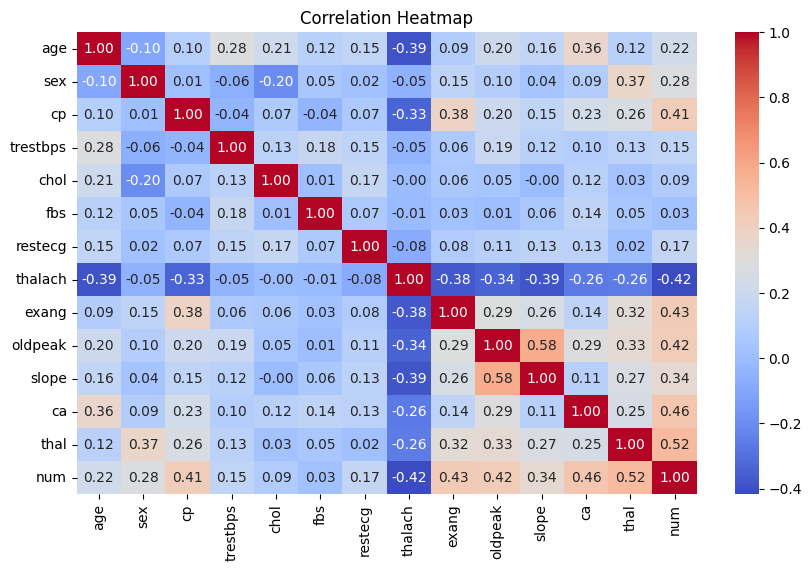

In [ ]:
print(df.describe())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Step 4 : Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X = df.drop("num", axis=1)
y = df["num"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Step 5 : Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

acc_lr = accuracy_score(y_test, log_reg.predict(X_test))
acc_rf = accuracy_score(y_test, rf.predict(X_test))

print(f"Logistic Regression Accuracy: {acc_lr:.4f}")
print(f"Random Forest Accuracy: {acc_rf:.4f}")

if acc_lr > acc_rf:
    print("✅ Logistic Regression is better")
else:
    print("✅ Random Forest is better")


Logistic Regression Accuracy: 0.8852
Random Forest Accuracy: 0.8361
✅ Logistic Regression is better


# Step 6 : Outcome

### Objective:
Build a simple ML workflow to predict heart disease.

### Dataset:
UCI Cleveland Heart Disease dataset (303 records, 14 features).

### Preprocessing:

Missing values handled (mean for numeric, mode for categorical).

Numeric features normalized (0–1).

Categorical values label-encoded.

Target converted to binary (0 = no disease, 1 = disease).

### EDA:

describe() showed valid ranges.

Heatmap revealed chest pain type, thalach, and ca strongly correlated with target.

### Models Trained:

Logistic Regression

Random Forest

Results (Accuracy):

Logistic Regression: 88.52%

Random Forest: 83.61%

Better model: Logistic Regression (slightly higher accuracy).

### Conclusion:
The pipeline successfully predicts heart disease using basic preprocessing, EDA, and two ML models.Logistic Regression performed best, Random Forest but  provides interpretability.

# Step 7 : Model Saving (Optional)

In [ ]:
import joblib
joblib.dump(log_reg, "log_reg_model.pkl")


['log_reg_model.pkl']

# Step 8 : Streamlit